Error: Could not extract all metadynamics parameters.


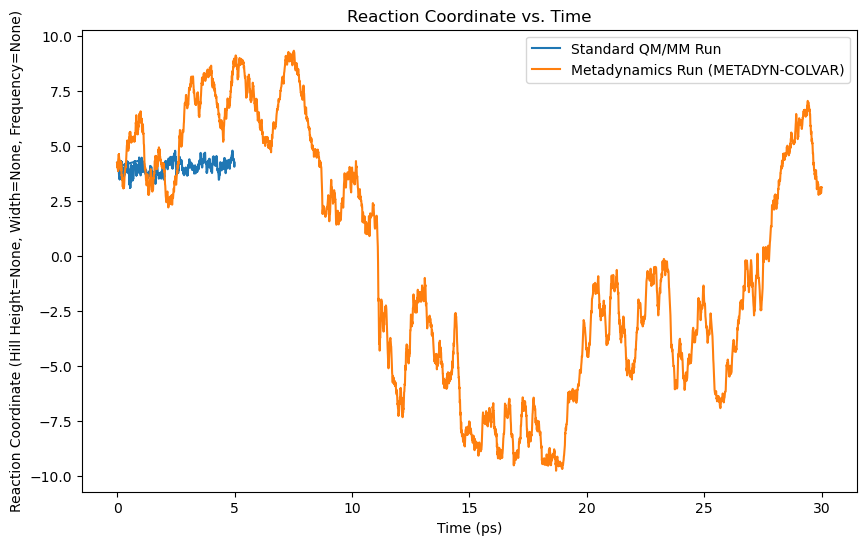


Transitions in the first simulation (Standard QM/MM):
Series([], Name: ReactionCoordinate, dtype: object)

Transitions in the second simulation (Metadynamics):
2259    True
5490    True
5492    True
5540    True
5543    True
5547    True
5565    True
5567    True
5586    True
5591    True
Name: ReactionCoordinate, dtype: object


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to read and extract the metadynamics parameters from the .inp file
def extract_metadynamics_params(inp_file):
    hill_height = None
    hill_width = None
    hill_frequency = None
    
    # Open the .inp file and search for the metadynamics parameters
    with open(inp_file, 'r') as f:
        for line in f:
            if 'hill_height' in line:
                hill_height = float(line.split()[-1])  # Assuming the value is the last element in the line
            elif 'hill_width' in line:
                hill_width = float(line.split()[-1])
            elif 'hill_frequency' in line:
                hill_frequency = int(line.split()[-1])  # Assuming it's an integer value
                
    return hill_height, hill_width, hill_frequency

# Step 1: Extract the metadynamics parameters from the .inp file
inp_file = 'metadynamics.inp'  # Replace with the actual path to the .inp file
hill_height, hill_width, hill_frequency = extract_metadynamics_params(inp_file)

# Check if the parameters were successfully extracted
if hill_height and hill_width and hill_frequency:
    print(f"Metadynamics Parameters:\nHill Height: {hill_height}\nHill Width: {hill_width}\nHill Frequency: {hill_frequency}")
else:
    print("Error: Could not extract all metadynamics parameters.")

# Step 2: Read the COLVAR data (reaction coordinates) from both simulations
colvar_data1 = pd.read_csv('MONITOR-COLVAR.metadynLog', delimiter='\s+', header=None)
colvar_data1 = colvar_data1[[0, 1]]
colvar_data1.columns = ['Time', 'ReactionCoordinate']
colvar_data1['Time'] = colvar_data1['Time'] / 1000  # Convert time from fs to ps

colvar_data2 = pd.read_csv('METADYN-COLVAR.metadynLog', delimiter='\s+', header=None)
colvar_data2 = colvar_data2[[0, 1]]
colvar_data2.columns = ['Time', 'ReactionCoordinate']
colvar_data2['Time'] = colvar_data2['Time'] / 1000  # Convert time from fs to ps

# Step 3: Plot the reaction coordinate from both simulations
plt.figure(figsize=(10, 6))

# Plot the first simulation (MONITOR-COLVAR)
plt.plot(colvar_data1['Time'], colvar_data1['ReactionCoordinate'], label='Standard QM/MM Run')

# Plot the second simulation (METADYN-COLVAR)
plt.plot(colvar_data2['Time'], colvar_data2['ReactionCoordinate'], label='Metadynamics Run (METADYN-COLVAR)')

# Step 4: Add metadynamics parameters (hill height, width, and frequency)
plt.xlabel('Time (ps)')
plt.ylabel(f'Reaction Coordinate (Hill Height={hill_height}, Width={hill_width}, Frequency={hill_frequency})')
plt.title('Reaction Coordinate vs. Time')

# Step 5: Add a legend
plt.legend()

# Step 6: Display the plot
plt.show()

# Step 7: Check for transitions (from + to - or - to +)
transition1 = colvar_data1['ReactionCoordinate'].apply(lambda x: x > 0).diff().dropna()
transition2 = colvar_data2['ReactionCoordinate'].apply(lambda x: x > 0).diff().dropna()

# Print information about the transitions
print("\nTransitions in the first simulation (Standard QM/MM):")
print(transition1[transition1 != 0])

print("\nTransitions in the second simulation (Metadynamics):")
print(transition2[transition2 != 0])


Metadynamics Parameters:
Hill Height: 1.5
Hill Width: 0.5
Hill Frequency: 20


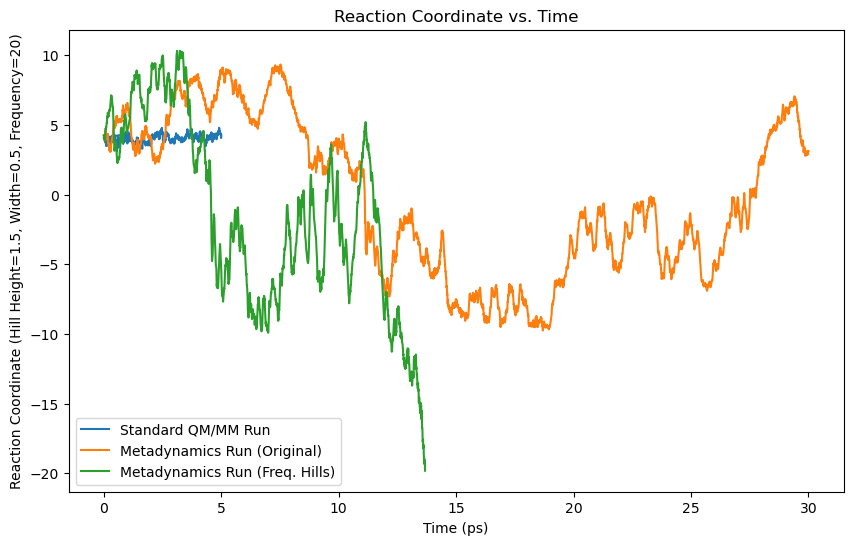


Transitions in the first simulation (Standard QM/MM):
Series([], Name: ReactionCoordinate, dtype: object)

Transitions in the second simulation (Metadynamics - Original):
2259    True
5490    True
5492    True
5540    True
5543    True
5547    True
5565    True
5567    True
5586    True
5591    True
Name: ReactionCoordinate, dtype: object

Transitions in the third simulation (Metadynamics - Freq. Hills):
912     True
1699    True
1703    True
1757    True
1768    True
1778    True
1783    True
1892    True
1899    True
1905    True
1954    True
1980    True
1995    True
2167    True
2295    True
Name: ReactionCoordinate, dtype: object


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to read and extract the metadynamics parameters from the .inp file
def extract_metadynamics_params(inp_file):
    hill_height = 1.5
    hill_width = 0.5
    hill_frequency = 20
    
    # Open the .inp file and search for the metadynamics parameters
    with open(inp_file, 'r') as f:
        for line in f:
            if 'hill_height' in line:
                hill_height = float(line.split()[-1])  # Assuming the value is the last element in the line
            elif 'hill_width' in line:
                hill_width = float(line.split()[-1])
            elif 'hill_frequency' in line:
                hill_frequency = int(line.split()[-1])  # Assuming it's an integer value
                
    return hill_height, hill_width, hill_frequency

# Step 1: Extract the metadynamics parameters from the .inp file
inp_file = 'metadynamics.inp'  # Replace with the actual path to the .inp file
hill_height, hill_width, hill_frequency = extract_metadynamics_params(inp_file)

# Check if the parameters were successfully extracted
if hill_height and hill_width and hill_frequency:
    print(f"Metadynamics Parameters:\nHill Height: {hill_height}\nHill Width: {hill_width}\nHill Frequency: {hill_frequency}")
else:
    print("Error: Could not extract all metadynamics parameters.")

# Step 2: Read the COLVAR data (reaction coordinates) from both simulations
# First simulation - standard QM/MM run
colvar_data1 = pd.read_csv('MONITOR-COLVAR.metadynLog', delimiter='\s+', header=None)
colvar_data1 = colvar_data1[[0, 1]]  # Select the first two columns
colvar_data1.columns = ['Time', 'ReactionCoordinate']
colvar_data1['Time'] = colvar_data1['Time'] / 1000  # Convert time from fs to ps

# Second simulation - metadynamics run (with initial frequency hills)
colvar_data2 = pd.read_csv('METADYN-COLVAR.metadynLog', delimiter='\s+', header=None)
colvar_data2 = colvar_data2[[0, 1]]  # Select the first two columns
colvar_data2.columns = ['Time', 'ReactionCoordinate']
colvar_data2['Time'] = colvar_data2['Time'] / 1000  # Convert time from fs to ps

# Third simulation - metadynamics run with changed frequency of hills
colvar_data3 = pd.read_csv('METADYN-COLVAR (1).metadynLog', delimiter='\s+', header=None)
colvar_data3 = colvar_data3[[0, 1]]  # Select the first two columns
colvar_data3.columns = ['Time', 'ReactionCoordinate']
colvar_data3['Time'] = colvar_data3['Time'] / 1000  # Convert time from fs to ps

# Step 3: Plot the reaction coordinate from all three simulations
plt.figure(figsize=(10, 6))

# Plot the first simulation (Standard QM/MM)
plt.plot(colvar_data1['Time'], colvar_data1['ReactionCoordinate'], label='Standard QM/MM Run')

# Plot the second simulation (Metadynamics Run)
plt.plot(colvar_data2['Time'], colvar_data2['ReactionCoordinate'], label='Metadynamics Run (Original)')

# Plot the third simulation (Metadynamics Run with Frequency Hills Change)
plt.plot(colvar_data3['Time'], colvar_data3['ReactionCoordinate'], label='Metadynamics Run (Freq. Hills)')

# Step 4: Add metadynamics parameters to the label (e.g., hill height, width, frequency)
plt.xlabel('Time (ps)')
plt.ylabel(f'Reaction Coordinate (Hill Height={hill_height}, Width={hill_width}, Frequency={hill_frequency})')
plt.title('Reaction Coordinate vs. Time')

# Add a legend to the plot
plt.legend()

# Step 5: Display the plot
plt.show()

# Step 6: Check for transitions (from + to - or - to +) in each simulation
transition1 = colvar_data1['ReactionCoordinate'].apply(lambda x: x > 0).diff().dropna()
transition2 = colvar_data2['ReactionCoordinate'].apply(lambda x: x > 0).diff().dropna()
transition3 = colvar_data3['ReactionCoordinate'].apply(lambda x: x > 0).diff().dropna()

# Print information about the transitions in each simulation
print("\nTransitions in the first simulation (Standard QM/MM):")
print(transition1[transition1 != 0])

print("\nTransitions in the second simulation (Metadynamics - Original):")
print(transition2[transition2 != 0])

print("\nTransitions in the third simulation (Metadynamics - Freq. Hills):")
print(transition3[transition3 != 0])
